In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("muted")

df = pd.read_csv('./data/input/train.csv', index_col=0, parse_dates=True)
test = pd.read_csv('./data/input/test.csv', index_col=0, parse_dates=True)

In [2]:
print(df.head())
print(df.describe())
print(df.info())

                     season  holiday  workingday  weather  temp   atemp   
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0      

In [3]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

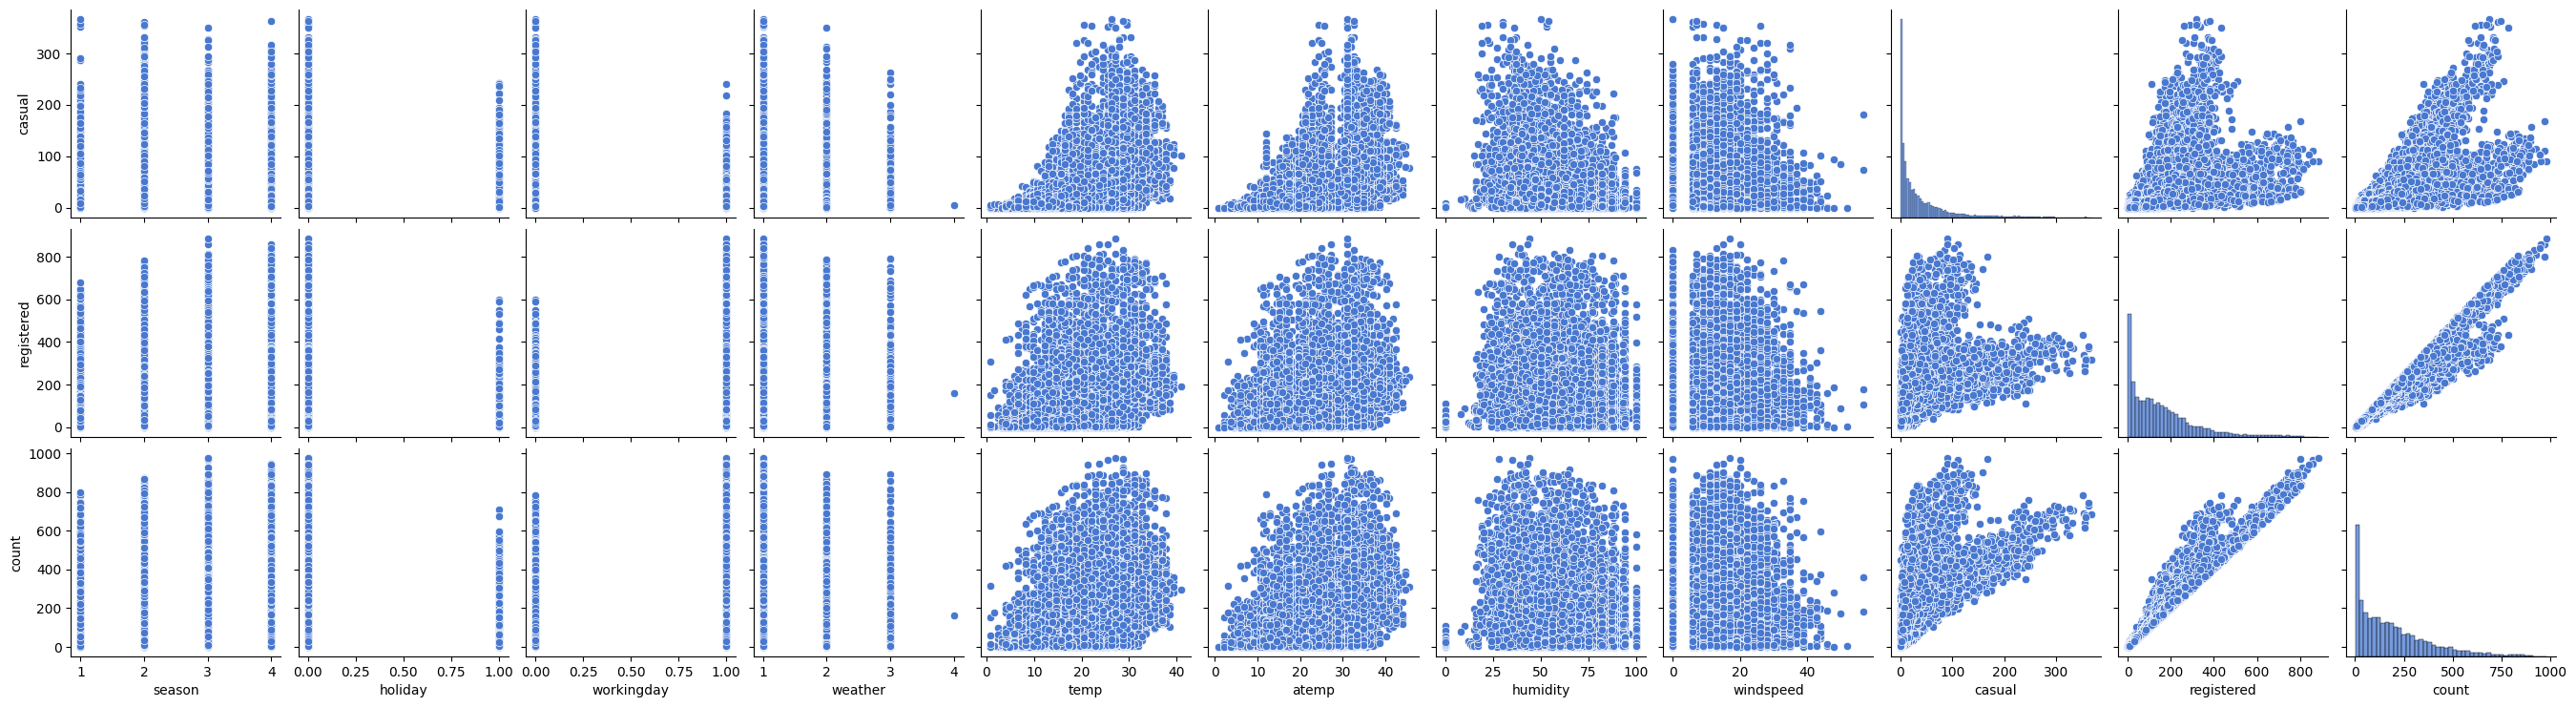

In [4]:
sns.pairplot(df, y_vars=['casual', 'registered', 'count'])

Text(0, 0.5, 'The number of rented bikes')

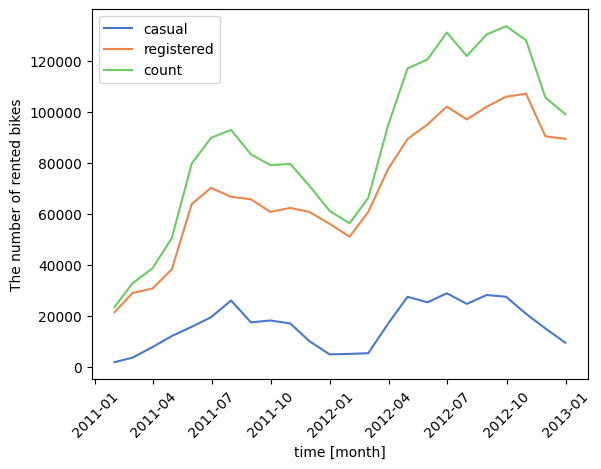

In [5]:
df_cnt = df.loc[:, ['casual', 'registered', 'count']].resample('M').sum()
for col in ['casual', 'registered', 'count']:
    plt.plot(df_cnt.index, df_cnt[col], label=col)
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('time [month]')
plt.ylabel('The number of rented bikes')

Text(0, 0.5, 'The number of rented bikes')

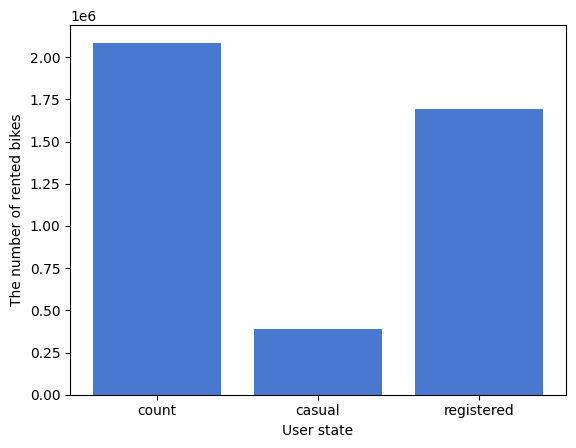

In [6]:
plt.bar(x=['count', 'casual', 'registered'], height=df.loc[:, ['count', 'casual', 'registered']].sum())
plt.xlabel('User state')
plt.ylabel('The number of rented bikes')

<Axes: xlabel='casual', ylabel='Count'>

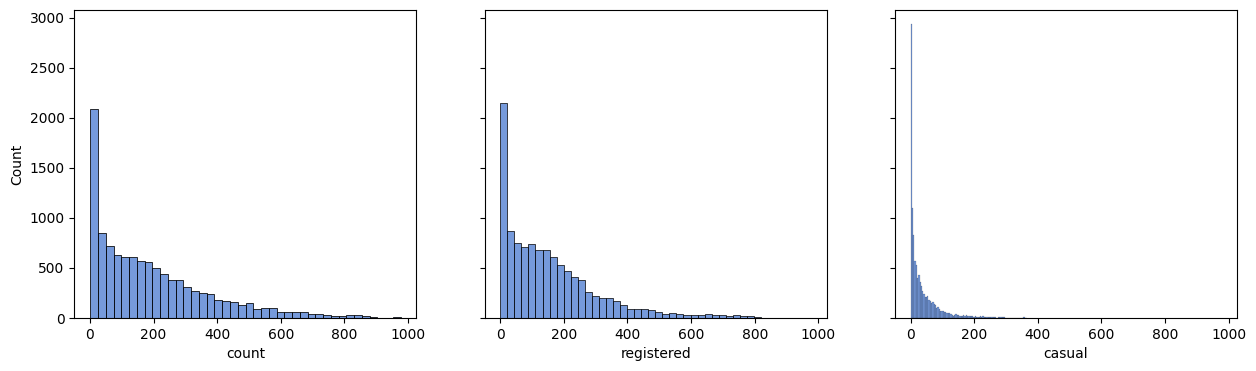

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True, sharex=True)

sns.histplot(x='count', data=df, ax=axes[0], bins=40)
sns.histplot(x='registered', data=df, ax=axes[1], bins=40)
sns.histplot(x='casual', data=df, ax=axes[2])

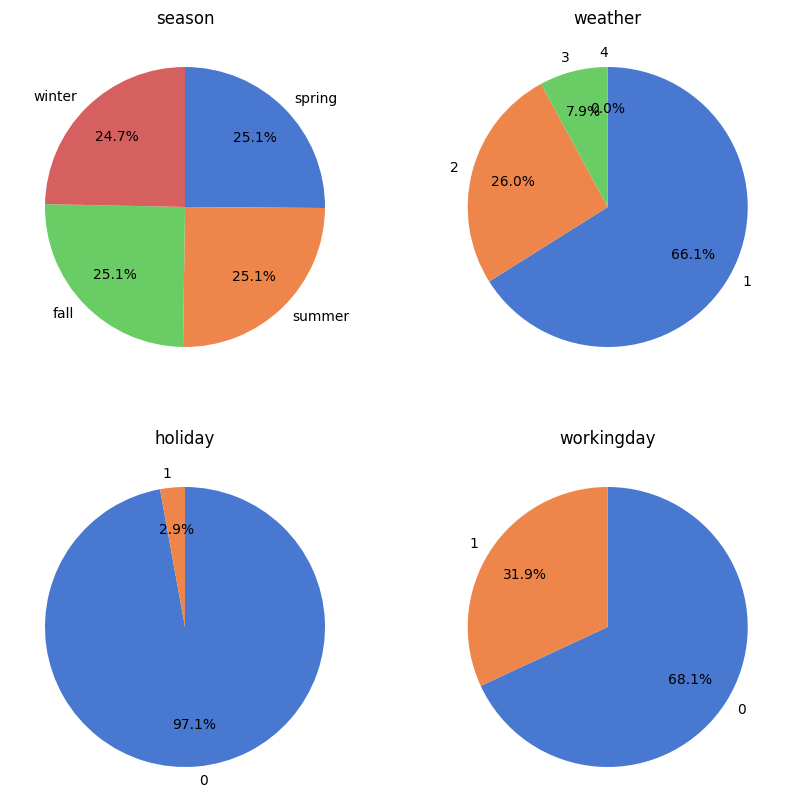

In [8]:
# categorical:  ['season', 'holiday', 'workingday', 'weather']
# numerial: ['temp', 'atemp', 'humidity', 'windseed']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

labels = [
    ['spring', 'summer', 'fall', 'winter'],
    [1, 2, 3, 4],
    [0, 1],
    [0, 1]]
cols_ctg = ['season', 'weather', 'holiday', 'workingday']

for i in range(2):
    for j in range(2):
        axes[i, j].pie(df[cols_ctg[i*2+j]].value_counts(), labels=labels[i*2+j], counterclock=False, startangle=90, autopct='%1.1f%%', pctdistance=0.7)
        axes[i, j].set_title(cols_ctg[i*2+j])
plt.show()

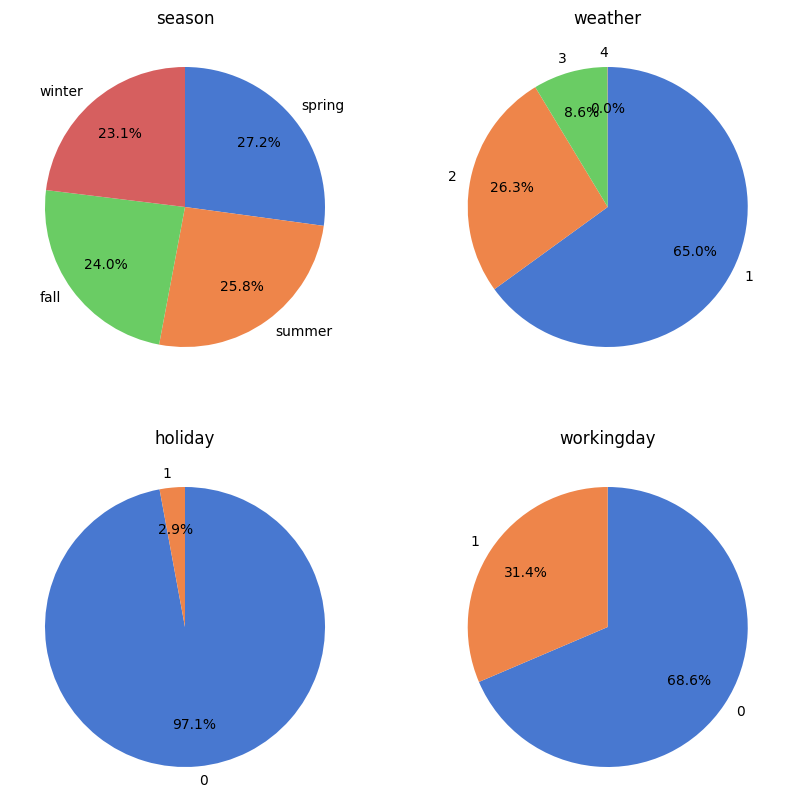

In [9]:
# test data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

labels = [
    ['spring', 'summer', 'fall', 'winter'],
    [1, 2, 3, 4],
    [0, 1],
    [0, 1]]
cols_ctg = ['season', 'weather', 'holiday', 'workingday']

for i in range(2):
    for j in range(2):
        axes[i, j].pie(test[cols_ctg[i*2+j]].value_counts(), labels=labels[i*2+j], counterclock=False, startangle=90, autopct='%1.1f%%', pctdistance=0.7)
        axes[i, j].set_title(cols_ctg[i*2+j])
plt.show()

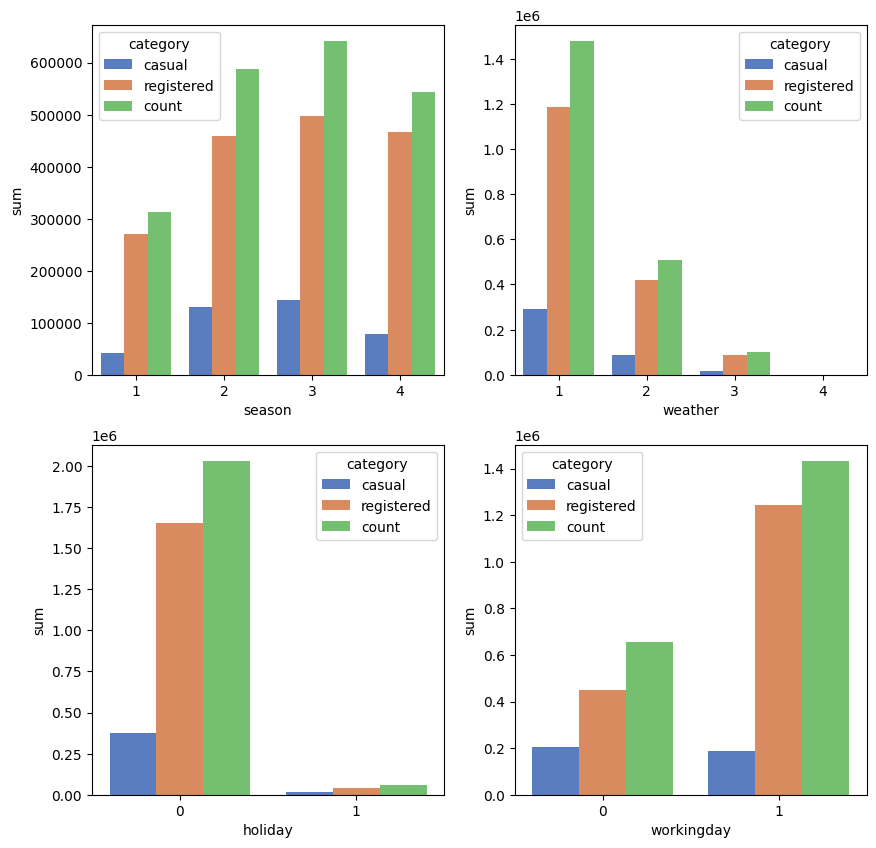

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        df_fig = df.loc[:, [cols_ctg[i*2+j], 'casual', 'registered', 'count']].groupby(cols_ctg[i*2+j]).sum()
        df_fig = df_fig.stack().rename('sum').rename_axis([cols_ctg[i*2+j], 'category']).reset_index()
        sns.barplot(x=cols_ctg[i*2+j], y='sum', data=df_fig, hue='category', ax=axes[i, j])
plt.show()

<Axes: >

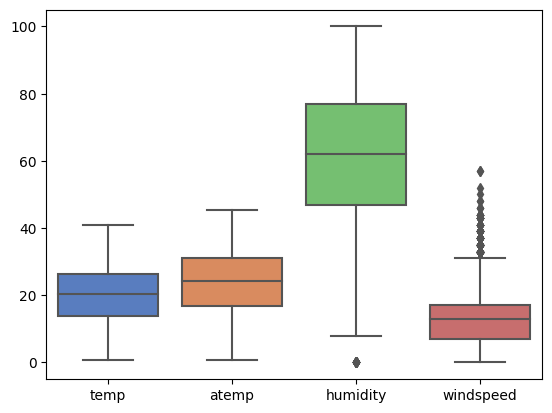

In [11]:
# numerial: ['temp', 'atemp', 'humidity', 'windspeed']
cols_num = ['temp', 'atemp', 'humidity', 'windspeed']

sns.boxplot(data=df.loc[:, cols_num])

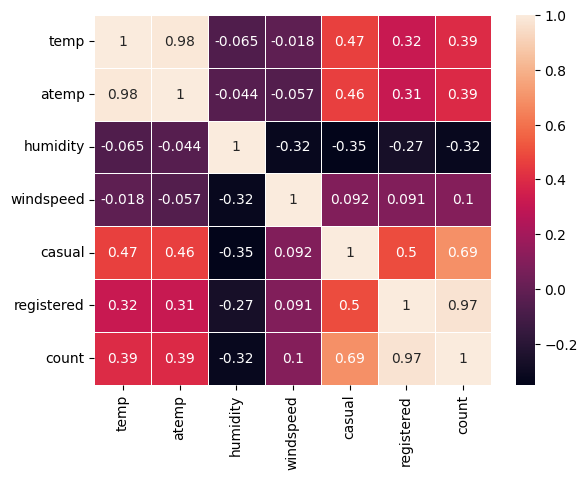

In [12]:
corr = df.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(data=corr, linewidths=0.5, annot=True)
plt.show()

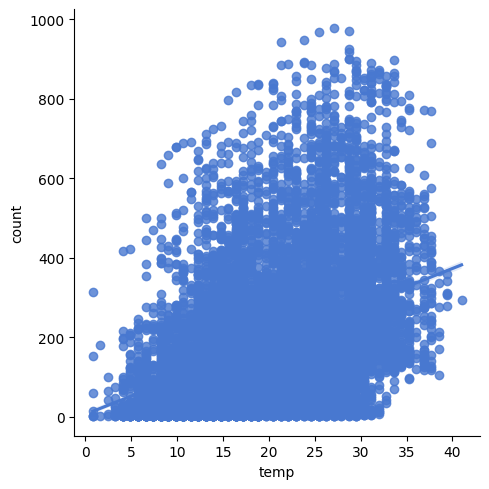

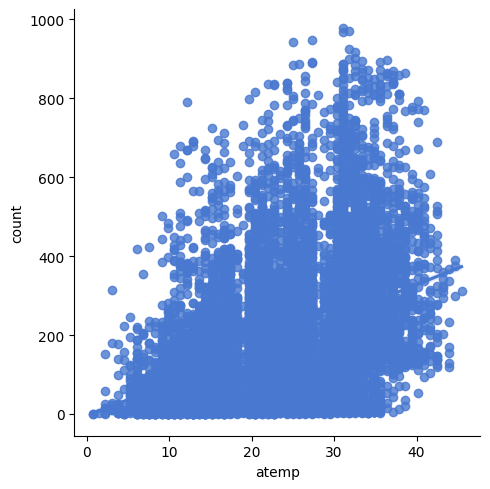

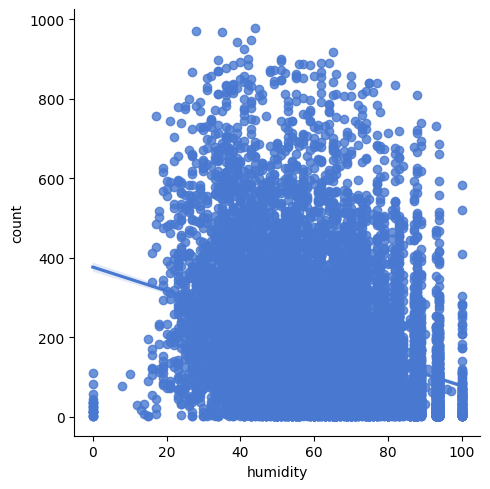

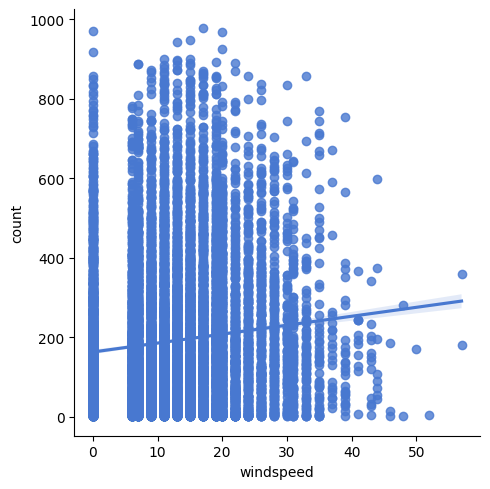

In [13]:
for i in range(2):
    for j in range(2):
        sns.lmplot(x=cols_num[i*2+j], y='count', data=df)
        plt.show()

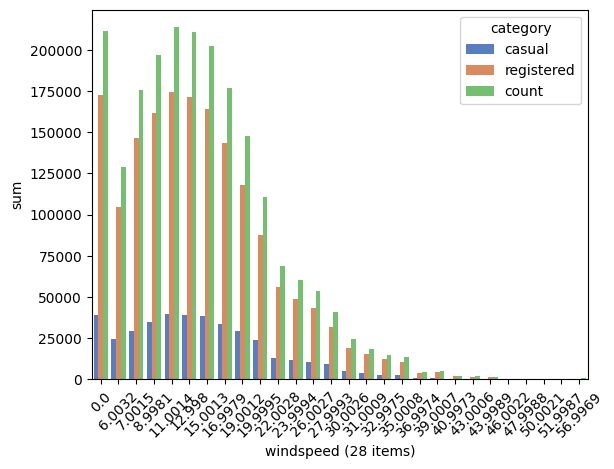

In [14]:
df_wind = df.loc[:, ['windspeed', 'casual', 'registered', 'count']].groupby('windspeed').sum()
df_wind = df_wind.stack().rename('sum').rename_axis(['windspeed', 'category']).reset_index()
sns.barplot(x='windspeed', y='sum', data=df_wind, hue='category')
plt.xticks(rotation=45)
plt.xlabel('windspeed (28 items)')
plt.show()

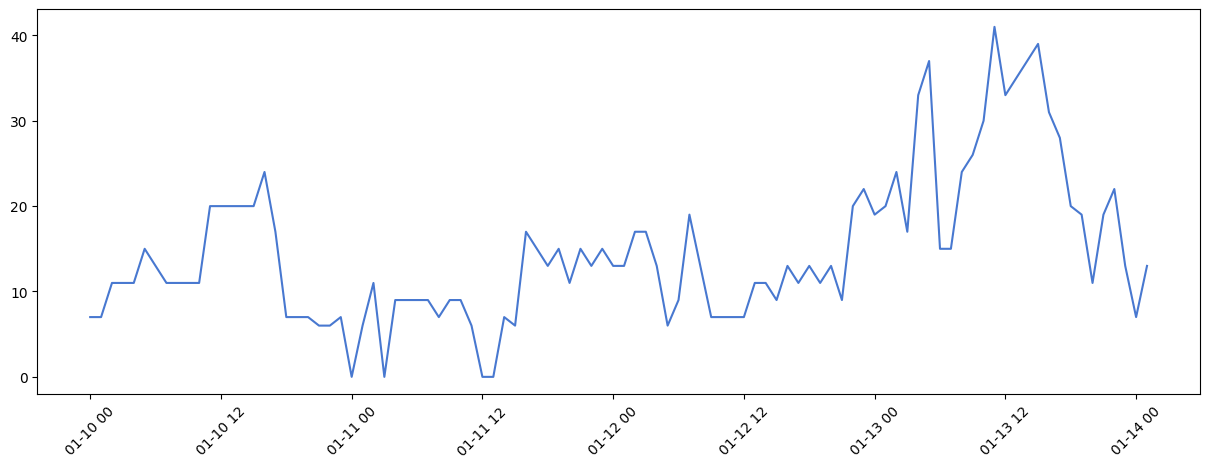

In [15]:
df_wind_sub = df.loc['2012-01-10-00':'2012-01-14-01', 'windspeed']
plt.figure(figsize=(15, 5))
plt.plot(df_wind_sub.index, df_wind_sub, ls='-', marker='')
plt.xticks(rotation=45)
plt.show()

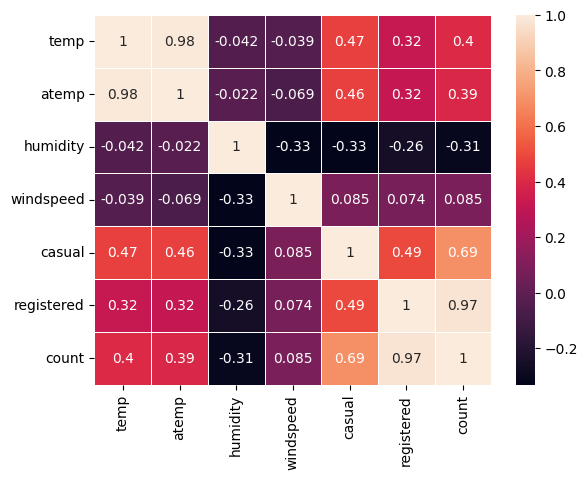

In [16]:
df_wind_nz = df[df.loc[:, 'windspeed'] != 0].copy()

corr = df_wind_nz.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(data=corr, linewidths=0.5, annot=True)
plt.show()

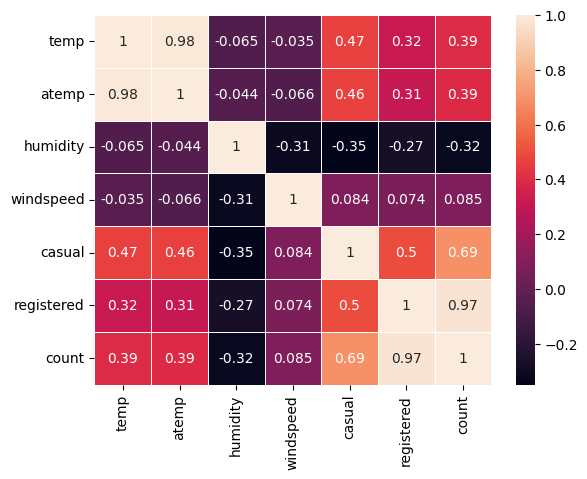

In [17]:
# mean = 平均値, mode = 最頻値
df_wind_cp = df.copy()
val = df_wind_cp.loc[:, 'windspeed'].mean()
df_wind_cp.loc[df_wind_cp[df_wind_cp['windspeed'] == 0].index, 'windspeed'] = val

corr = df_wind_cp.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(data=corr, linewidths=0.5, annot=True)
plt.show()

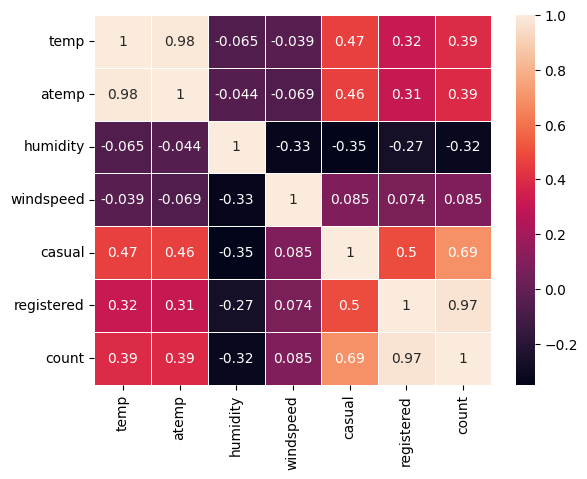

In [18]:
df_wind_cp = df.copy()
val = df_wind_cp.loc[:, 'windspeed'].mode()
df_wind_cp.loc[df_wind_cp[df_wind_cp['windspeed'] == 0].index, 'windspeed'] = val

corr = df_wind_cp.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(data=corr, linewidths=0.5, annot=True)
plt.show()

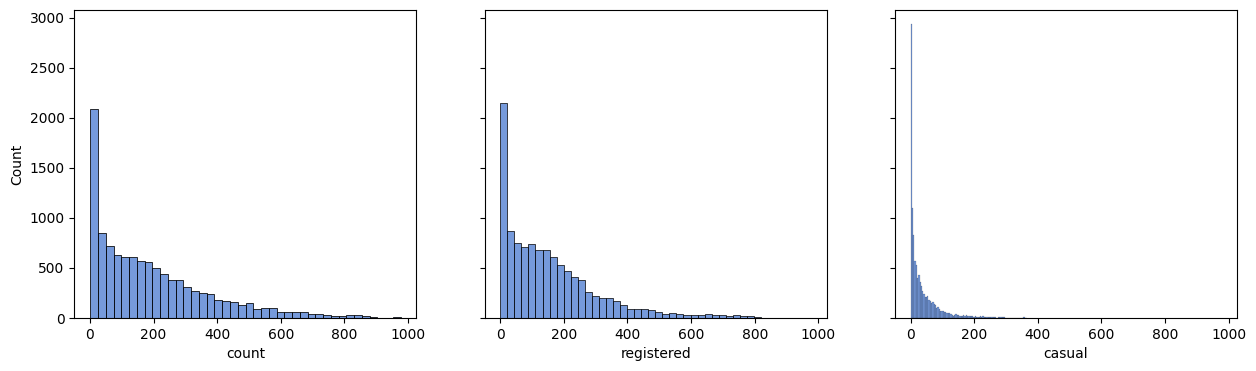

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True, sharex=True)

sns.histplot(x='count', data=df, ax=axes[0], bins=40)
sns.histplot(x='registered', data=df, ax=axes[1], bins=40)
sns.histplot(x='casual', data=df, ax=axes[2])
plt.show()

/home/usr0x3a/py/kaggle/bike/.venv_bike/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


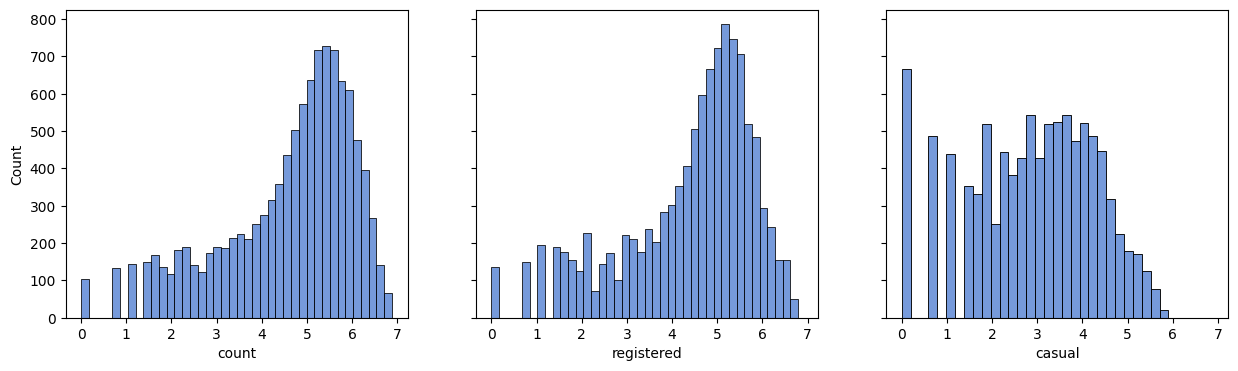

In [20]:
df_log = df.copy()
df_log.loc[:, 'count'] = np.log(df_log.loc[:, 'count'])
df_log.loc[:, 'registered'] = np.log(df_log.loc[:, 'registered'])
df_log.loc[:, 'casual'] = np.log(df_log.loc[:, 'casual'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True, sharex=True)

sns.histplot(x='count', data=df_log, ax=axes[0], bins=40)
sns.histplot(x='registered', data=df_log, ax=axes[1], bins=40)
sns.histplot(x='casual', data=df_log, ax=axes[2])
plt.show()

In [3]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

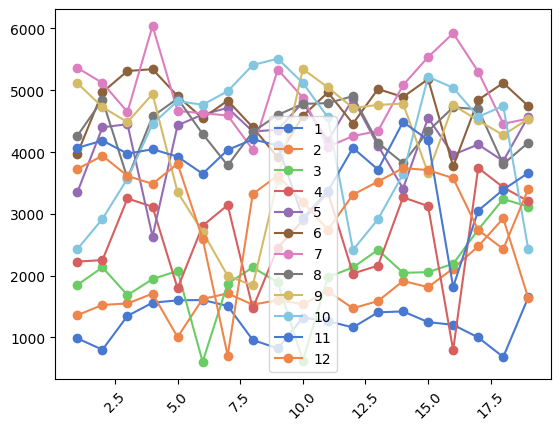

In [41]:
df_term = df.loc[df.index.year == 2011, ['count']]
for i in range(1, 13):
    df_term_m = df_term.loc[df_term.index.month == i, :].resample('D').sum()
    plt.plot(df_term_m.index.day, df_term_m, ls='-', marker='o', label=i)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [14]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

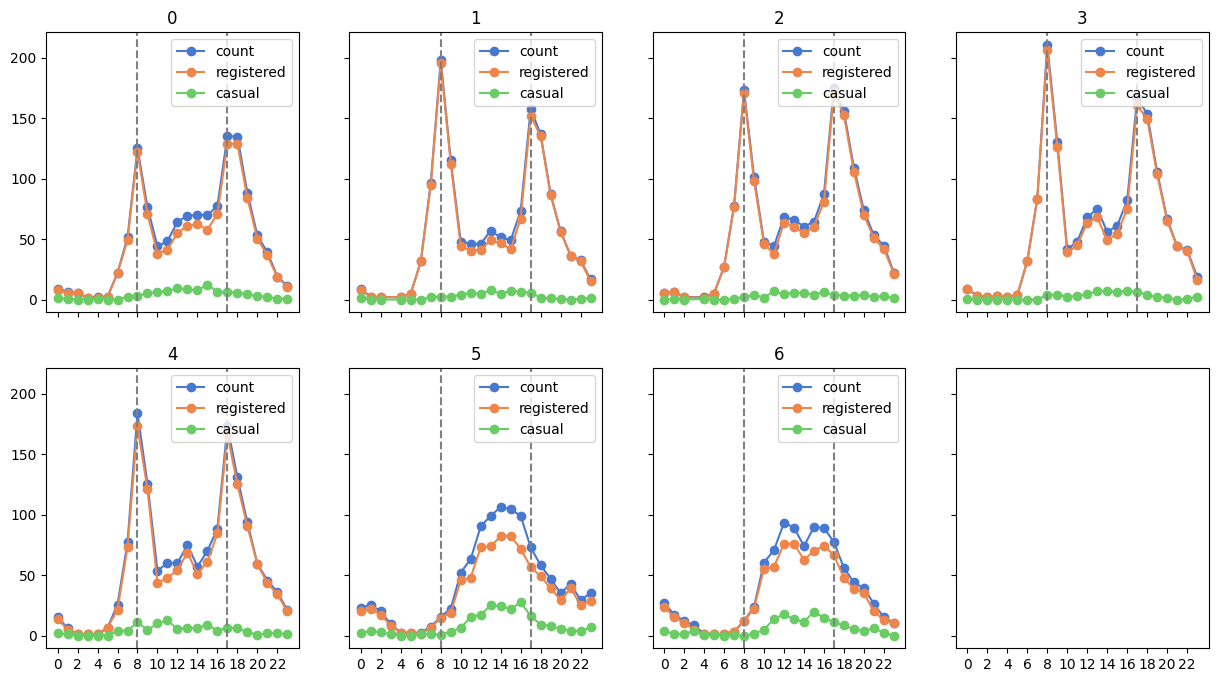

In [29]:
# graph
# make 7 lines (weekday)
# x-axis : hour
# y-axis : count

df_term = df.loc[df.index.year == 2011, ['count', 'registered', 'casual']]
df_term.loc[:, 'hour'] = df_term.index.hour
df_term.loc[:, 'weekday'] = df_term.index.weekday

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True, sharex=True)
for i in range(7):
    df_term = df_term_m.loc[df_term_m['weekday'] == i, :].groupby('hour').mean()
    axes[i//4, i%4].plot(df_term.index, df_term.loc[:, ['count']], ls='-', marker='o', label='count')
    axes[i//4, i%4].plot(df_term.index, df_term.loc[:, ['registered']], ls='-', marker='o', label='registered')
    axes[i//4, i%4].plot(df_term.index, df_term.loc[:, ['casual']], ls='-', marker='o', label='casual')
    axes[i//4, i%4].set_title(i)
    axes[i//4, i%4].set_xticks(range(0, 24, 2))
    axes[i//4, i%4].legend()
    # add lines at 8, 17
    axes[i//4, i%4].axvline(x=8, ls='--', color='gray')
    axes[i//4, i%4].axvline(x=17, ls='--', color='gray')
plt.show()

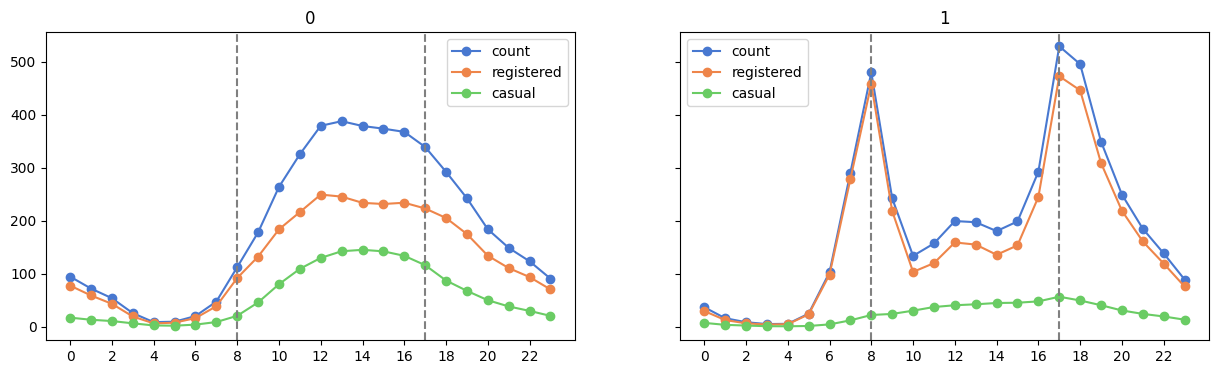

In [16]:
# graph
# make 2 lines (workingday)
# x-axis : hour

df_w = df.loc[:, ['casual', 'registered', 'count', 'workingday']]
df_w.loc[:, 'hour'] = df_w.index.hour

fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)
for i in df_w.loc[:, 'workingday'].unique().tolist():
    df_w_i = df_w.loc[df_w['workingday'] == i, :].groupby('hour').mean()
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['count']], ls='-', marker='o', label='count')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['registered']], ls='-', marker='o', label='registered')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['casual']], ls='-', marker='o', label='casual')
    axes[i].set_title(i)
    axes[i].set_xticks(range(0, 24, 2))
    axes[i].legend()
    # add lines at 8, 17
    axes[i].axvline(x=8, ls='--', color='gray')
    axes[i].axvline(x=17, ls='--', color='gray')
plt.show()

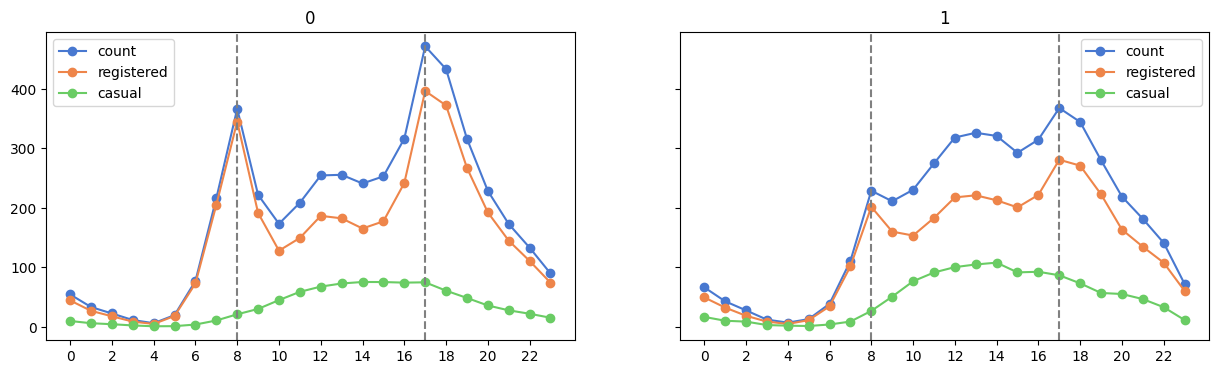

In [17]:
# graph
# make 2 lines (holiday)
# x-axis : hour

df_w = df.loc[:, ['casual', 'registered', 'count', 'holiday']]
df_w.loc[:, 'hour'] = df_w.index.hour

fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)
for i in df_w.loc[:, 'holiday'].unique().tolist():
    df_w_i = df_w.loc[df_w['holiday'] == i, :].groupby('hour').mean()
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['count']], ls='-', marker='o', label='count')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['registered']], ls='-', marker='o', label='registered')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['casual']], ls='-', marker='o', label='casual')
    axes[i].set_title(i)
    axes[i].set_xticks(range(0, 24, 2))
    axes[i].legend()
    # add lines at 8, 17
    axes[i].axvline(x=8, ls='--', color='gray')
    axes[i].axvline(x=17, ls='--', color='gray')
plt.show()

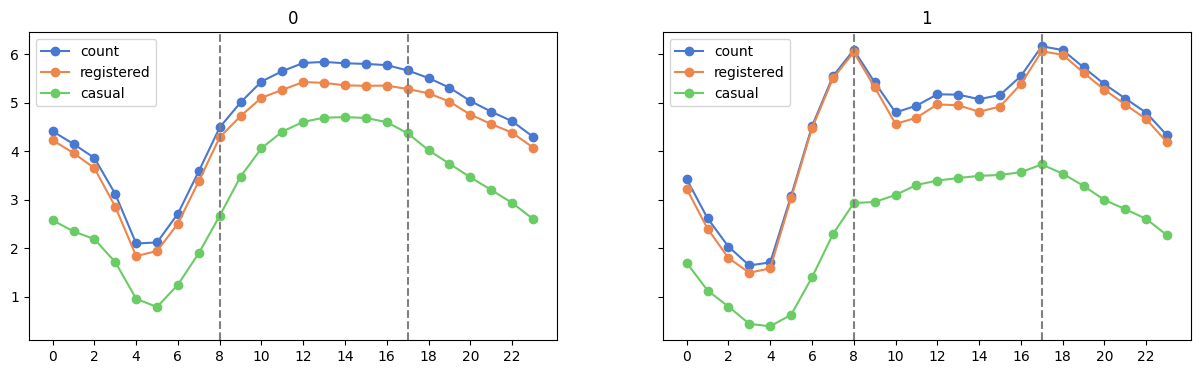

In [18]:
# graph
# make 2 lines (workingday)
# x-axis : hour

df_w = df.loc[:, ['casual', 'registered', 'count', 'workingday']]
df_w.loc[:, 'hour'] = df_w.index.hour
df_w.loc[:, ['casual', 'registered', 'count']] = np.log1p(df_w.loc[:, ['casual', 'registered', 'count']])

fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)
for i in df_w.loc[:, 'workingday'].unique().tolist():
    df_w_i = df_w.loc[df_w['workingday'] == i, :].groupby('hour').mean()
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['count']], ls='-', marker='o', label='count')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['registered']], ls='-', marker='o', label='registered')
    axes[i].plot(df_w_i.index, df_w_i.loc[:, ['casual']], ls='-', marker='o', label='casual')
    axes[i].set_title(i)
    axes[i].set_xticks(range(0, 24, 2))
    axes[i].legend()
    # add lines at 8, 17
    axes[i].axvline(x=8, ls='--', color='gray')
    axes[i].axvline(x=17, ls='--', color='gray')
plt.show()

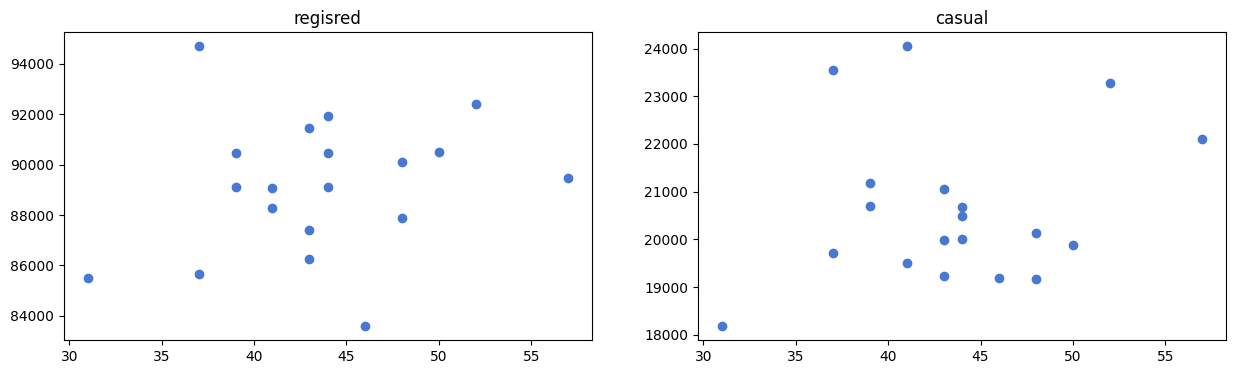

In [42]:
# graph
# relationship between day average of windspeed and day average of count
# x-axis : windspeed
# y-axis : count

df_w = df.loc[:, ['windspeed', 'count', 'casual', 'registered']]
df_w.loc[:, 'day'] = df_w.index.day

wind_max = df_w.loc[:, ['day', 'windspeed']].groupby('day').max()
df_w = df_w.groupby('day').sum()
df_w.loc[:, 'wind_max'] = wind_max.loc[:, 'windspeed']

fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
axes[0].scatter(df_w.loc[:, 'wind_max'], df_w.loc[:, 'registered'], marker='o')
axes[0].set_title('regisred')
axes[1].scatter(df_w.loc[:, 'wind_max'], df_w.loc[:, 'casual'], marker='o')
axes[1].set_title('casual')
plt.show()